In [29]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 



In [30]:
refugeeData = pd.read_csv('C:/Users/ChiaYanLingA/Downloads/Hack4Good/population.csv') #change 

# Remove columns
refugeeData = refugeeData.drop(refugeeData.columns[[1,2,3,4]],axis=1)

# To get rid of all the years less than 2000
for i in range(0,len(refugeeData)):
    if refugeeData.loc[i,"Year"] < 2000:
        refugeeData = refugeeData.drop([i])
    else:
        pass

# Replace all NaN values with 0
refugeeData = refugeeData.replace(np.nan,0)
# Print dataframe
refugeeData

,Year,Refugees under UNHCR's mandate,Asylum-seekers,Returned refugees,IDPs of concern to UNHCR,Returned IDPss,Stateless persons,Others of concern,Venezuelans displaced abroad
49,2000,12129080,947322,767383,5998501,369055,0,1653841,0.0
50,2001,12116301,943383,462396,5096502,240950,0,1039510,0.0
51,2002,10593526,1093121,2426009,4646641,1179038,0,953319,0.0
52,2003,9592279,995567,1094889,4181701,237798,0,905344,0.0
53,2004,9572778,884285,1434190,5426539,146516,1455861,597042,0.0
54,2005,8661294,801119,1105477,6616791,519430,2383651,960359,0.0
55,2006,9877009,740253,733557,12794268,1864171,5805941,1045409,0.0
56,2007,11390156,739958,730573,13740317,2070118,2938538,68615,0.0
57,2008,10488995,823931,603884,14442227,1361436,6573465,166860,0.0
58,2009,10395780,988030,251413,15628057,2229540,6559572,411691,0.0


In [31]:
# selecting columns
refugeeData = refugeeData.iloc[:,np.r_[:,0:3, 4, 6:8]]
final = refugeeData[refugeeData['Stateless persons'] != 0] #remove 0 values
final

,Year,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern
53,2004,9572778,884285,5426539,1455861,597042
54,2005,8661294,801119,6616791,2383651,960359
55,2006,9877009,740253,12794268,5805941,1045409
56,2007,11390156,739958,13740317,2938538,68615
57,2008,10488995,823931,14442227,6573465,166860
58,2009,10395780,988030,15628057,6559572,411691
59,2010,10548900,835969,14697804,3463073,1255578
60,2011,10403951,895692,15473378,3477100,1411844
61,2012,10497028,941497,17670368,3335772,1329600
62,2013,11698238,1162934,23925555,3469268,836073


In [32]:
final.dtypes
#Year has to be converted into datetime for time series plot

Year                              int64
Refugees under UNHCR's mandate    int64
Asylum-seekers                    int64
IDPs of concern to UNHCR          int64
Stateless persons                 int64
Others of concern                 int64
dtype: object

In [33]:
pd.PeriodIndex(final['Year'], freq = 'A')
#final.index.to_period("Y") #converts to format YYYY
#final

PeriodIndex(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
             '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
             '2020', '2021'],
            dtype='period[A-DEC]', name='Year')

In [34]:
# Reset index to 'Year'
final = final.set_index('Year')
#final

In [35]:
final.dtypes #Year now in datetime

Refugees under UNHCR's mandate    int64
Asylum-seekers                    int64
IDPs of concern to UNHCR          int64
Stateless persons                 int64
Others of concern                 int64
dtype: object

In [36]:
# to check individual statistic description
final.describe()

,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,1.407917e+07,1.992939e+06,2.612714e+07,3.899710e+06,2.025833e+06
std,4.616169e+06,1.398952e+06,1.496091e+07,1.302753e+06,2.645255e+06
min,8.661294e+06,7.399580e+05,5.426539e+06,1.455861e+06,6.861500e+04
25%,1.042521e+07,8.480480e+05,1.450612e+07,3.367597e+06,8.113312e+05
50%,1.154420e+07,1.075482e+06,2.079796e+07,3.590007e+06,1.049078e+06
75%,1.925150e+07,3.189971e+06,3.871243e+07,4.173180e+06,1.391283e+06
max,2.083537e+07,4.409770e+06,5.087290e+07,6.573465e+06,8.426151e+06


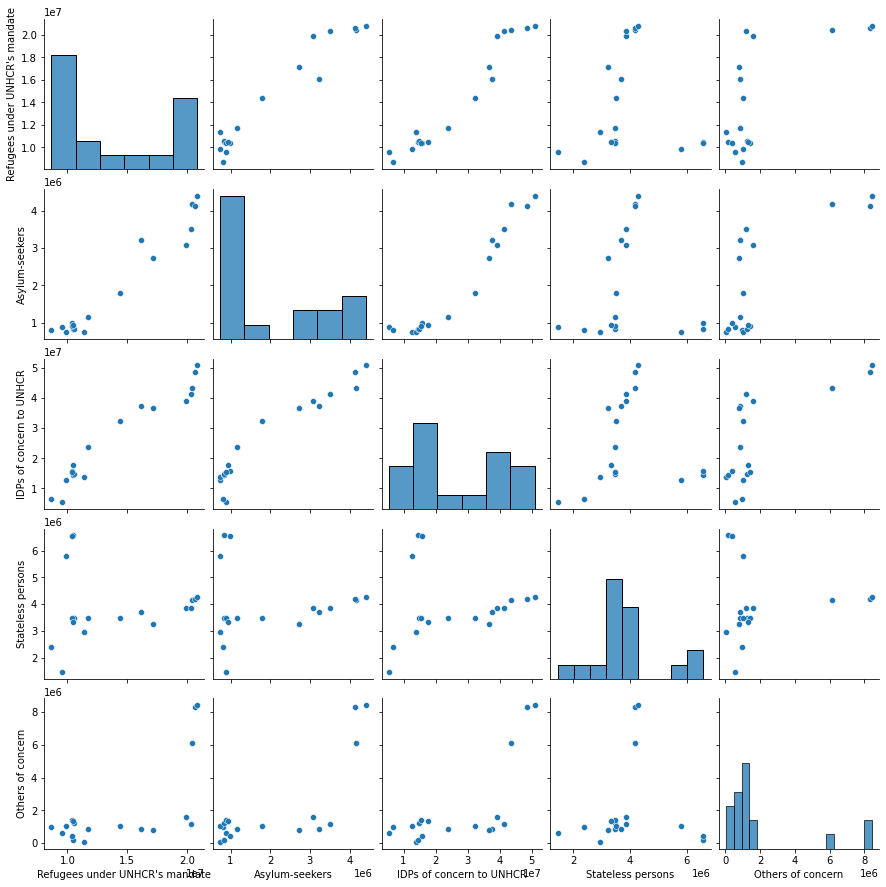

In [37]:
sb.pairplot(data = final)

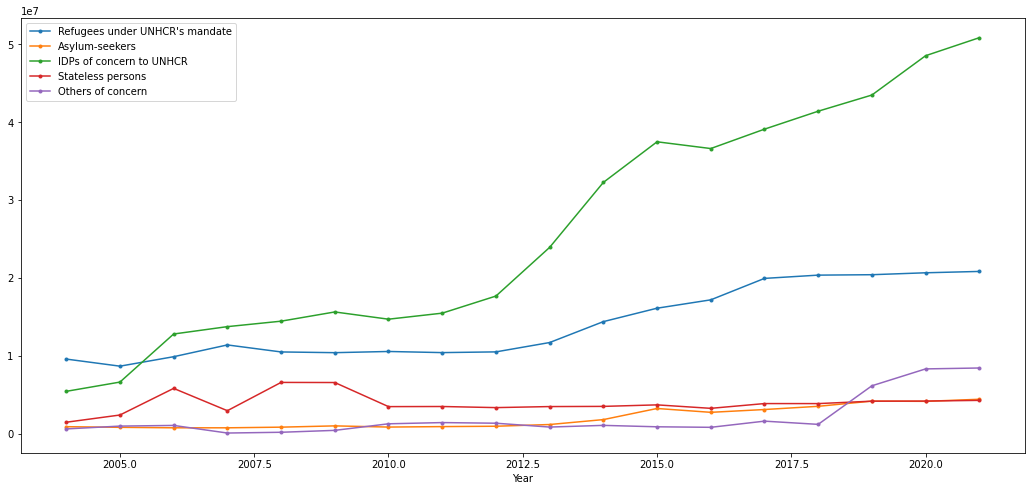

In [38]:
#plotting variables - noted its not time series yet
final.plot(marker='.', figsize = (18,8))
plt.show()

<AxesSubplot:>

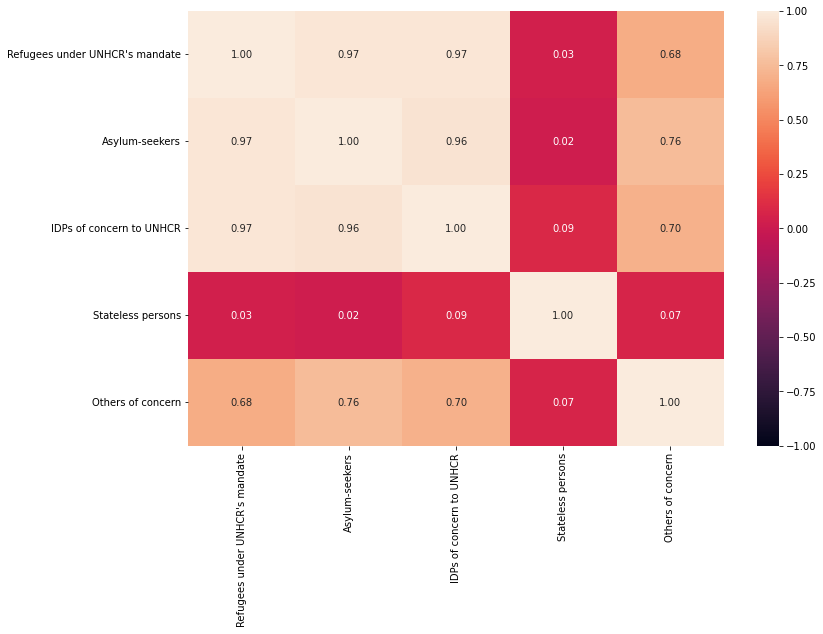

In [39]:
#first step in time-series analysis isnit root test to determine whether the series are stationary
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(final.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<AxesSubplot:xlabel='Year'>

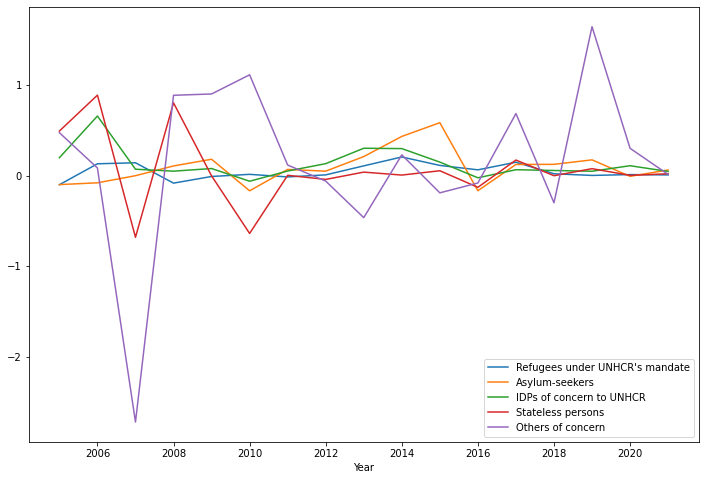

In [40]:
# check pattern of time series
final = np.log(final).diff().dropna()
final.plot(figsize = (12,8)) 
# strong corr between refugees, stateless persons, aslyum seekers & IDPs of concern


Building VAR model

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

Running Granger's Casuality Test

In [43]:
from statsmodels.tsa.stattools import grangercausalitytests
#if the p-value > 0.05 -> accept the null hypothesis, p-value < 0.05 -> reject the null hypothesis.

# Performing test on refugees vs aslyum seekers
data = final[["Refugees under UNHCR's mandate", "Asylum-seekers"]].pct_change().dropna()
gc_res = grangercausalitytests(data, 4) #max allowable lag is 4



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1464  , p=0.7086  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.1831  , p=0.6688  , df=1
likelihood ratio test: chi2=0.1819  , p=0.6697  , df=1
parameter F test:         F=0.1464  , p=0.7086  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4737  , p=0.6374  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=1.4737  , p=0.4786  , df=2
likelihood ratio test: chi2=1.4012  , p=0.4963  , df=2
parameter F test:         F=0.4737  , p=0.6374  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7652  , p=0.5537  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=4.9739  , p=0.1737  , df=3
likelihood ratio test: chi2=4.2116  , p=0.2395  , df=3
parameter F test:         F=0.7652  , p=0.5537  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7591  , p=0.3353  , df_denom

In [45]:
## Performing test on refugees vs IDPs
data2 = final[["Refugees under UNHCR's mandate","IDPs of concern to UNHCR"]].pct_change().dropna()
gc_res = grangercausalitytests(data2, 4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2524  , p=0.1593  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=2.8155  , p=0.0934  , df=1
likelihood ratio test: chi2=2.5803  , p=0.1082  , df=1
parameter F test:         F=2.2524  , p=0.1593  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6711  , p=0.2414  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=5.1991  , p=0.0743  , df=2
likelihood ratio test: chi2=4.4213  , p=0.1096  , df=2
parameter F test:         F=1.6711  , p=0.2414  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1459  , p=0.4039  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=7.4481  , p=0.0589  , df=3
likelihood ratio test: chi2=5.8882  , p=0.1172  , df=3
parameter F test:         F=1.1459  , p=0.4039  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4660  , p=0.7628  , df_denom

In [46]:
# Performing test on refugees vs stateless persons
data3 = final[["Refugees under UNHCR's mandate","Stateless persons"]].pct_change().dropna()
gc_res = grangercausalitytests(data3, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2889  , p=0.2784  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=1.6111  , p=0.2043  , df=1
likelihood ratio test: chi2=1.5303  , p=0.2161  , df=1
parameter F test:         F=1.2889  , p=0.2784  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7046  , p=0.5197  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=2.1921  , p=0.3342  , df=2
likelihood ratio test: chi2=2.0365  , p=0.3612  , df=2
parameter F test:         F=0.7046  , p=0.5197  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=14.2333 , p=0.0039  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=92.5167 , p=0.0000  , df=3
likelihood ratio test: chi2=27.2210 , p=0.0000  , df=3
parameter F test:         F=14.2333 , p=0.0039  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.9070  , p=0.0516  , df_denom

In [47]:
# Performing test on refugees vs others of concern
data4 = final[["Refugees under UNHCR's mandate","Others of concern"]].pct_change().dropna()
gc_res = grangercausalitytests(data4, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1968  , p=0.6652  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.2460  , p=0.6199  , df=1
likelihood ratio test: chi2=0.2440  , p=0.6213  , df=1
parameter F test:         F=0.1968  , p=0.6652  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2320  , p=0.7976  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=0.7217  , p=0.6971  , df=2
likelihood ratio test: chi2=0.7038  , p=0.7034  , df=2
parameter F test:         F=0.2320  , p=0.7976  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3311  , p=0.8037  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=2.1519  , p=0.5415  , df=3
likelihood ratio test: chi2=1.9913  , p=0.5742  , df=3
parameter F test:         F=0.3311  , p=0.8037  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3550  , p=0.8287  , df_denom

In [48]:
# Performing test on aslyum seekers vs IDPs
data5 = final[["Asylum-seekers", "IDPs of concern to UNHCR"]].pct_change().dropna()
gc_res = grangercausalitytests(data5, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1584  , p=0.6976  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.1980  , p=0.6563  , df=1
likelihood ratio test: chi2=0.1967  , p=0.6574  , df=1
parameter F test:         F=0.1584  , p=0.6976  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5687  , p=0.2603  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=4.8805  , p=0.0871  , df=2
likelihood ratio test: chi2=4.1870  , p=0.1233  , df=2
parameter F test:         F=1.5687  , p=0.2603  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1572  , p=0.9213  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=1.0216  , p=0.7960  , df=3
likelihood ratio test: chi2=0.9835  , p=0.8053  , df=3
parameter F test:         F=0.1572  , p=0.9213  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3388  , p=0.4220  , df_denom

In [49]:
# Performing test on aslyum seekers vs stateless persons
data6 = final[["Asylum-seekers", "Stateless persons"]].pct_change().dropna()
gc_res = grangercausalitytests(data6, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0127  , p=0.9122  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.0159  , p=0.8998  , df=1
likelihood ratio test: chi2=0.0158  , p=0.8998  , df=1
parameter F test:         F=0.0127  , p=0.9122  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0175  , p=0.9827  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=0.0544  , p=0.9732  , df=2
likelihood ratio test: chi2=0.0543  , p=0.9732  , df=2
parameter F test:         F=0.0175  , p=0.9827  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2642  , p=0.3678  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=8.2173  , p=0.0417  , df=3
likelihood ratio test: chi2=6.3683  , p=0.0950  , df=3
parameter F test:         F=1.2642  , p=0.3678  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=11.2629 , p=0.0375  , df_denom

In [50]:
# Performing test on aslyum seekers vs others of concern
data7 = final[["Asylum-seekers", "Others of concern"]].pct_change().dropna()
gc_res = grangercausalitytests(data7, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=67.6558 , p=0.0000  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=84.5697 , p=0.0000  , df=1
likelihood ratio test: chi2=28.3921 , p=0.0000  , df=1
parameter F test:         F=67.6558 , p=0.0000  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=25.4238 , p=0.0002  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=79.0963 , p=0.0000  , df=2
likelihood ratio test: chi2=26.5241 , p=0.0000  , df=2
parameter F test:         F=25.4238 , p=0.0002  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3302  , p=0.8043  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=2.1462  , p=0.5426  , df=3
likelihood ratio test: chi2=1.9864  , p=0.5752  , df=3
parameter F test:         F=0.3302  , p=0.8043  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4819  , p=0.3888  , df_denom

In [51]:
# Performing test on IDPs vs stateless persons
data8 = final[["IDPs of concern to UNHCR","Stateless persons"]].pct_change().dropna()
gc_res = grangercausalitytests(data8, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1625  , p=0.1671  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=2.7032  , p=0.1001  , df=1
likelihood ratio test: chi2=2.4854  , p=0.1149  , df=1
parameter F test:         F=2.1625  , p=0.1671  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5803  , p=0.2581  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=4.9166  , p=0.0856  , df=2
likelihood ratio test: chi2=4.2137  , p=0.1216  , df=2
parameter F test:         F=1.5803  , p=0.2581  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8378  , p=0.5206  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=5.4456  , p=0.1419  , df=3
likelihood ratio test: chi2=4.5484  , p=0.2080  , df=3
parameter F test:         F=0.8378  , p=0.5206  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2064  , p=0.4569  , df_denom

In [52]:
# Performing test on IDPs vs others of concern
data9 = final[["IDPs of concern to UNHCR","Others of concern"]].pct_change().dropna()
gc_res = grangercausalitytests(data9, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2232  , p=0.6451  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.2790  , p=0.5974  , df=1
likelihood ratio test: chi2=0.2764  , p=0.5991  , df=1
parameter F test:         F=0.2232  , p=0.6451  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3891  , p=0.6885  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=1.2106  , p=0.5459  , df=2
likelihood ratio test: chi2=1.1611  , p=0.5596  , df=2
parameter F test:         F=0.3891  , p=0.6885  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4095  , p=0.7522  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=2.6618  , p=0.4468  , df=3
likelihood ratio test: chi2=2.4216  , p=0.4896  , df=3
parameter F test:         F=0.4095  , p=0.7522  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5870  , p=0.6969  , df_denom

In [53]:
# Performing test on others of concern vs stateless persons
data10 = final[["Others of concern","Stateless persons"]].pct_change().dropna()
gc_res = grangercausalitytests(data10, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0160  , p=0.9015  , df_denom=12, df_num=1
ssr based chi2 test:   chi2=0.0200  , p=0.8877  , df=1
likelihood ratio test: chi2=0.0199  , p=0.8877  , df=1
parameter F test:         F=0.0160  , p=0.9015  , df_denom=12, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0059  , p=0.9941  , df_denom=9, df_num=2
ssr based chi2 test:   chi2=0.0184  , p=0.9908  , df=2
likelihood ratio test: chi2=0.0184  , p=0.9908  , df=2
parameter F test:         F=0.0059  , p=0.9941  , df_denom=9, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8708  , p=0.2354  , df_denom=6, df_num=3
ssr based chi2 test:   chi2=12.1603 , p=0.0069  , df=3
likelihood ratio test: chi2=8.5841  , p=0.0354  , df=3
parameter F test:         F=1.8708  , p=0.2354  , df_denom=6, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3179  , p=0.2579  , df_denom

Cointegratation Test - to find out the statistical connection between 2 or more time series

In [54]:
df = final[["Refugees under UNHCR's mandate", "Asylum-seekers", "IDPs of concern to UNHCR", "Others of concern", "Stateless persons"]].pct_change().dropna()
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Refugees under UNHCR's mandate ::  206.46    > 60.0627   =>   True
Asylum-seekers ::  104.07    > 40.1749   =>   True
IDPs of concern to UNHCR ::  47.79     > 24.2761   =>   True
Others of concern ::  20.2      > 12.3212   =>   True
Stateless persons ::  1.36      > 4.1296    =>   False


In [55]:
var = VAR(df)
x= var.select_order()
x.summary()
# minimum values with * sign

C:\Users\ChiaYanLingA\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,24.79,25.03*,5.864e+10,24.79
1,23.94*,25.35,3.149e+10*,23.92*


In [81]:
results = var.fit(1)
results.summary()

#model = VAR(df)
#maxlags = 1
#model.select_order(maxlags)
#model.fit(maxlags = maxlags).summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Mar, 2022
Time:                     16:30:11
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    25.3525
Nobs:                     15.0000    HQIC:                   23.9214
Log likelihood:          -255.944    FPE:                3.14901e+10
AIC:                      23.9364    Det(Omega_mle):     5.85509e+09
--------------------------------------------------------------------
Results for equation Refugees under UNHCR's mandate
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.895306         1.091158            0.821           0.412
L1.Refugees under UNHCR's mandate        -0.167060      

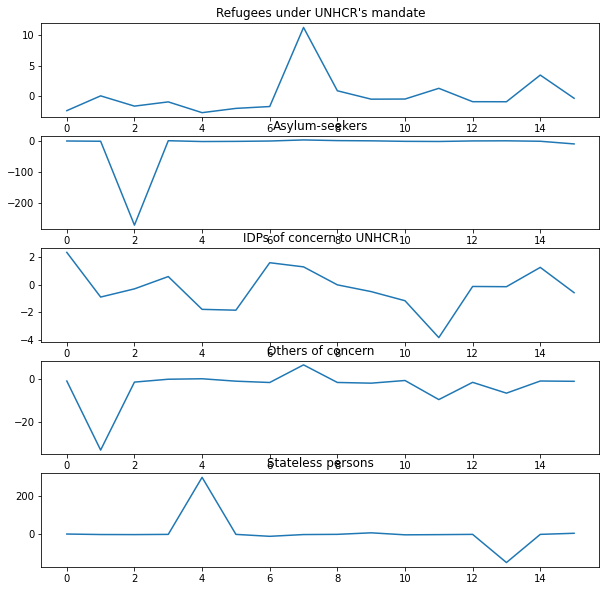

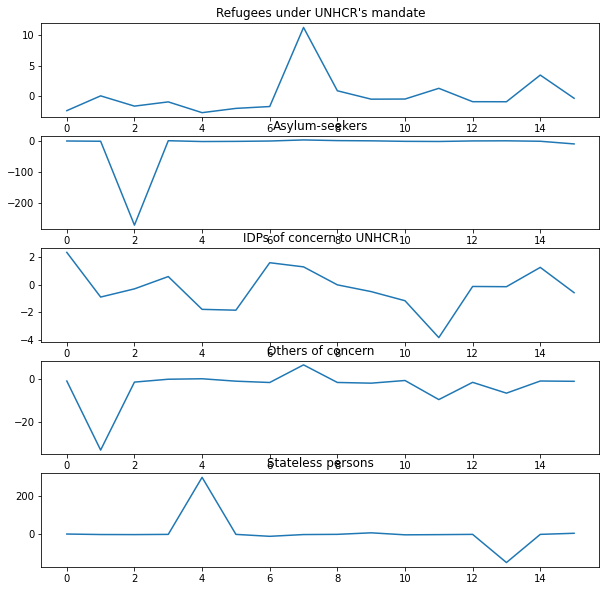

In [82]:
results.plot()


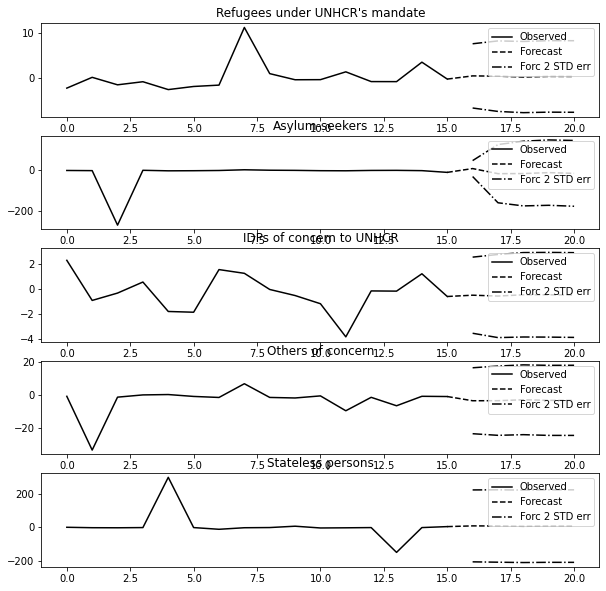

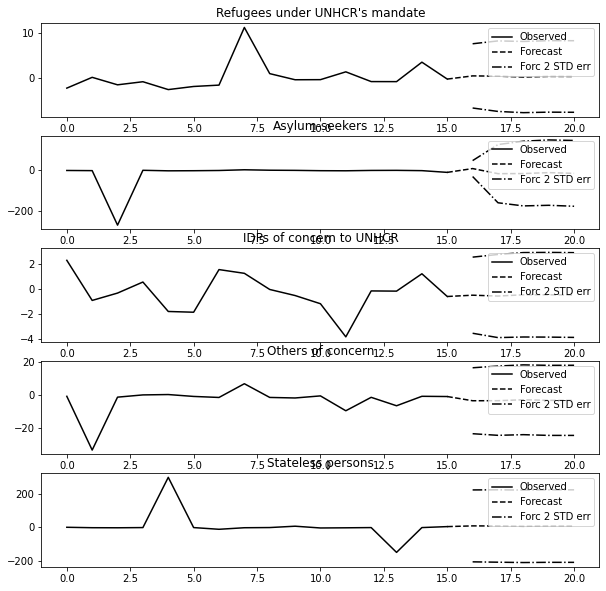

In [84]:
results.plot_forecast(5)
